In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import seaborn as sns

from sklearn.model_selection import train_test_split

__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

1. Facial recognition
2. Let's predict gender, age and etnicity of person from given picture
3. It is supervised classification
4. Performance will be measured in terms of accuracy for each of given categories

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

1. We will use "age, gender and etnicity face data" dataset from kaggle available at: https://www.kaggle.com/code/sanjay7013/age-gender-ethnicity-recognition/data  
-age is an integer from 0 to 116, indicating the age  
-gender is either 0 (male) or 1 (female)  
-race is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).  

In [2]:
df = pd.read_csv('datasets/7/age_gender.csv')
display(df)
data = np.array(df)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [3]:
### print(data.shape)

scaled = []
for a in df["pixels"]:
    scaled.append(list(map(lambda e: int(e) / 255, a.split(" "))))
    
scaled = np.reshape(scaled,[-1,48,48,1])
scaled[0]
#display(scaled)
#df["pixels"] = scaled
#display(df.head)

array([[[0.50588235],
        [0.50196078],
        [0.50196078],
        ...,
        [0.4627451 ],
        [0.38823529],
        [0.20784314]],

       [[0.50980392],
        [0.50588235],
        [0.50196078],
        ...,
        [0.45882353],
        [0.38431373],
        [0.20392157]],

       [[0.51372549],
        [0.50588235],
        [0.50980392],
        ...,
        [0.44705882],
        [0.38039216],
        [0.19607843]],

       ...,

       [[0.4745098 ],
        [0.54117647],
        [0.57647059],
        ...,
        [0.59215686],
        [0.58823529],
        [0.58039216]],

       [[0.45882353],
        [0.5372549 ],
        [0.57254902],
        ...,
        [0.58431373],
        [0.58039216],
        [0.58039216]],

       [[0.45098039],
        [0.52941176],
        [0.55686275],
        ...,
        [0.57254902],
        [0.57254902],
        [0.57254902]]])

In [4]:
#scaled = np.array(scaled)
sample = scaled[69]
display(scaled)
print(sample.size, "pixels")

array([[[[0.50588235],
         [0.50196078],
         [0.50196078],
         ...,
         [0.4627451 ],
         [0.38823529],
         [0.20784314]],

        [[0.50980392],
         [0.50588235],
         [0.50196078],
         ...,
         [0.45882353],
         [0.38431373],
         [0.20392157]],

        [[0.51372549],
         [0.50588235],
         [0.50980392],
         ...,
         [0.44705882],
         [0.38039216],
         [0.19607843]],

        ...,

        [[0.4745098 ],
         [0.54117647],
         [0.57647059],
         ...,
         [0.59215686],
         [0.58823529],
         [0.58039216]],

        [[0.45882353],
         [0.5372549 ],
         [0.57254902],
         ...,
         [0.58431373],
         [0.58039216],
         [0.58039216]],

        [[0.45098039],
         [0.52941176],
         [0.55686275],
         ...,
         [0.57254902],
         [0.57254902],
         [0.57254902]]],


       [[[0.64313725],
         [0.29019608],
         [0.43

2304 pixels


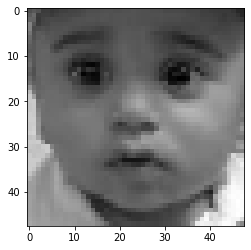

In [5]:
#scaled = np.array(scaled)
#sample = scaled[69]
#print(sample.size, "pixels")

plt.imshow(sample.reshape(48,48), cmap='gray')
plt.show()


0        0
1        0
2        0
3        0
4        0
        ..
23700    5
23701    5
23702    5
23703    5
23704    5
Name: age, Length: 23705, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

C:\Users\themr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of age')

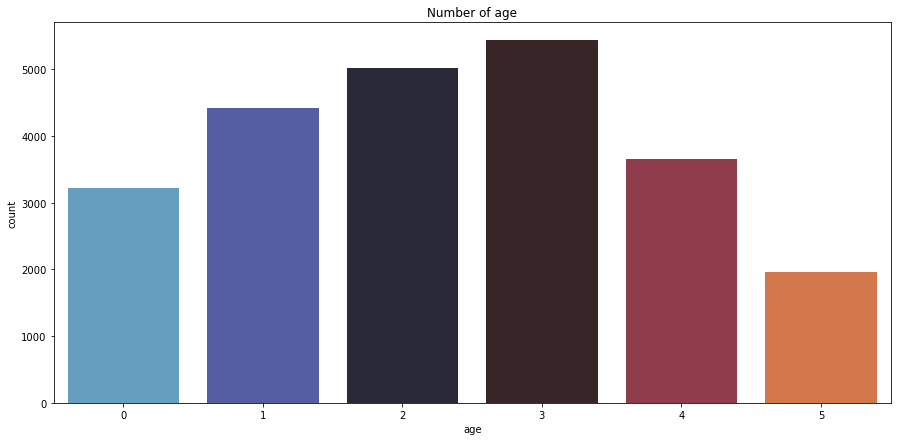

In [6]:
#under representation of age data - so binning
#age_map = {0:"0-3",1:"3-18",2:"18-45",3:"45-64",4:"64-116"}
#bins=[0,6,18,25,30,45,64,116],labels=["0","1","2","3","4","5","6"]
ages = pd.cut(df["age"],bins=[0,10,25,30,45,64,116],labels=["0","1","2","3","4","5"])#pd.qcut(df['age'], 10,labels = ["0-6","6-20","20-25","25-26","26-29","29-34","34-40","40-50","50-61","61-116"])
display(ages)
plt.figure(figsize=(15,7))
g = sns.countplot(ages, palette="icefire")
plt.title("Number of age")

In [7]:
aa = ages#np.array(ages)
y = to_categorical(aa, 6)
x = scaled

X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y)
print(X_train.shape)
Y_train.shape

(17778, 48, 48, 1)


(17778, 6)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='tanh', input_shape=X_train[0].shape)) #32 feature maps, 3*3 local receptive fields
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 6, activation = 'softmax')) #fully connected output layer

sgd = optimizers.SGD(learning_rate = 0.1) 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #try also adam 

history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, verbose = 1, validation_split = 0.3)

Epoch 1/10
249/249 [==============================] - 10s 38ms/step - loss: 1.4626 - accuracy: 0.3804 - val_loss: 1.3045 - val_accuracy: 0.4445
Epoch 2/10
249/249 [==============================] - 8s 33ms/step - loss: 1.2115 - accuracy: 0.4830 - val_loss: 1.2107 - val_accuracy: 0.4745
Epoch 3/10
249/249 [==============================] - 8s 34ms/step - loss: 1.1272 - accuracy: 0.5185 - val_loss: 1.1748 - val_accuracy: 0.4861
Epoch 4/10
249/249 [==============================] - 8s 31ms/step - loss: 1.0716 - accuracy: 0.5501 - val_loss: 1.1432 - val_accuracy: 0.5062
Epoch 5/10
249/249 [==============================] - 8s 33ms/step - loss: 1.0333 - accuracy: 0.5645 - val_loss: 1.1337 - val_accuracy: 0.5090
Epoch 6/10
249/249 [==============================] - 9s 37ms/step - loss: 0.9998 - accuracy: 0.5799 - val_loss: 1.1261 - val_accuracy: 0.5079
Epoch 7/10
249/249 [==============================] - 8s 33ms/step - loss: 0.9684 - accuracy: 0.5912 - val_loss: 1.1164 - val_accuracy: 0.508

Text(0, 0.5, 'Accuracy')

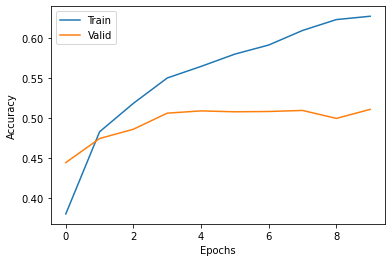

In [9]:
steps = len(history.history['accuracy'])
plt.plot(np.arange(steps), history.history['accuracy'], label = 'Train')
plt.plot(np.arange(steps), history.history['val_accuracy'], label = 'Valid')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [10]:
print("Accuracy on training data: {}".format(model.evaluate(X_train, Y_train)))
print("Accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

556/556 [==============================] - 3s 6ms/step - loss: 0.9284 - accuracy: 0.6159
Accuracy on training data: [0.9283664226531982, 0.6158735752105713]
186/186 [==============================] - 1s 7ms/step - loss: 1.1332 - accuracy: 0.5195
Accuracy on test data: [1.1332381963729858, 0.5194870829582214]


0          male
1          male
2          male
3          male
4          male
          ...  
23700    female
23701    female
23702    female
23703    female
23704    female
Name: gender, Length: 23705, dtype: object

Text(0.5, 1.0, 'gender representation')

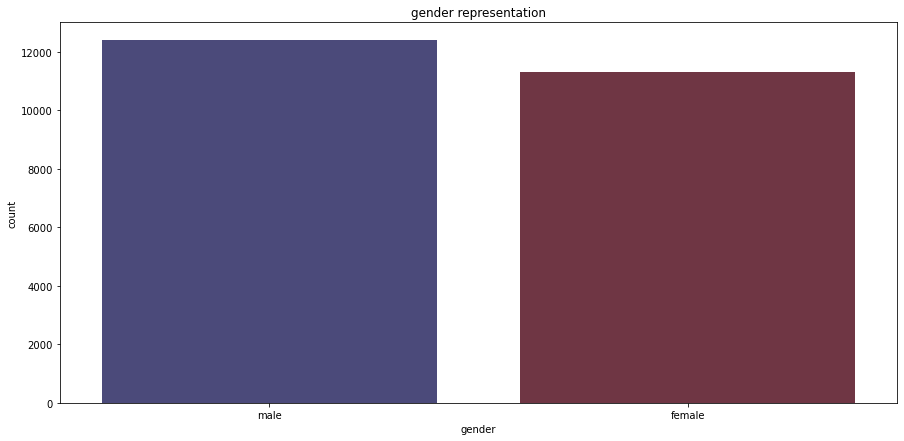

In [11]:
#under representation of gender data
genders = df['gender']
genders = genders.replace(0, 'male')
genders = genders.replace(1, 'female')
display(genders)

plt.figure(figsize=(15,7))
g = sns.countplot(x = genders, palette="icefire")
plt.title("gender representation")

In [20]:
from sklearn.ensemble import RandomForestClassifier
data = df['gender']
display(df['gender'])
y = to_categorical(data, num_classes = 2, dtype ="int32")
display(y)
x = scaled

X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y)
print(X_train.shape)
Y_train.shape

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

(17778, 48, 48, 1)


(17778, 2)

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='tanh', input_shape=X_train[0].shape)) #32 feature maps, 3*3 local receptive fields
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 2, activation = 'softmax')) #fully connected output layer

sgd = optimizers.SGD(learning_rate = 0.1) 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #try also adam 

history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, verbose = 1, validation_split = 0.3)

Epoch 1/10
249/249 [==============================] - 9s 33ms/step - loss: 0.4749 - accuracy: 0.7770 - val_loss: 0.3806 - val_accuracy: 0.8300
Epoch 2/10
249/249 [==============================] - 8s 32ms/step - loss: 0.3666 - accuracy: 0.8411 - val_loss: 0.3459 - val_accuracy: 0.8495
Epoch 3/10
249/249 [==============================] - 8s 34ms/step - loss: 0.3380 - accuracy: 0.8537 - val_loss: 0.3281 - val_accuracy: 0.8613
Epoch 4/10
249/249 [==============================] - 8s 31ms/step - loss: 0.3209 - accuracy: 0.8646 - val_loss: 0.3220 - val_accuracy: 0.8673
Epoch 5/10
249/249 [==============================] - 8s 32ms/step - loss: 0.3088 - accuracy: 0.8692 - val_loss: 0.3211 - val_accuracy: 0.8658
Epoch 6/10
249/249 [==============================] - 8s 31ms/step - loss: 0.2992 - accuracy: 0.8717 - val_loss: 0.3114 - val_accuracy: 0.8603
Epoch 7/10
249/249 [==============================] - 8s 32ms/step - loss: 0.2893 - accuracy: 0.8794 - val_loss: 0.3326 - val_accuracy: 0.8495

Text(0, 0.5, 'Accuracy')

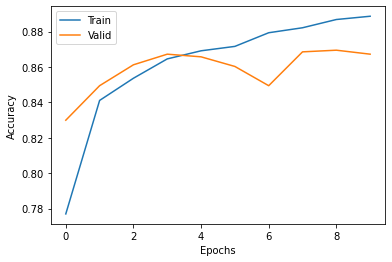

In [14]:
steps = len(history.history['accuracy'])
plt.plot(np.arange(steps), history.history['accuracy'], label = 'Train')
plt.plot(np.arange(steps), history.history['val_accuracy'], label = 'Valid')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [15]:
## Data prep 
data = df
display(type(scaled))
data['pixels'] = list(scaled)
data = data.drop(['img_name', 'age', 'ethnicity'], axis=1)
display(data)

numpy.ndarray

,gender,pixels
0,0,"[[[0.5058823529411764], [0.5019607843137255], ..."
1,0,"[[[0.6431372549019608], [0.2901960784313726], ..."
2,0,"[[[0.2627450980392157], [0.27450980392156865],..."
3,0,"[[[0.7568627450980392], [0.7725490196078432], ..."
4,0,"[[[0.792156862745098], [0.803921568627451], [0..."
...,...,...
23700,1,"[[[0.4980392156862745], [0.39215686274509803],..."
23701,1,"[[[0.09019607843137255], [0.10980392156862745]..."
23702,1,"[[[0.23137254901960785], [0.19607843137254902]..."
23703,1,"[[[0.17647058823529413], [0.4235294117647059],..."


In [16]:
## sklearn expects 2d array-model
## code reshapes train set images, which is 4d array to a 2d array
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [17]:
# Train Random foress (gender data) with default parameters
forest = RandomForestClassifier()
forest.fit(X_train2, Y_train)

print("Model accuracy on the original/test? data: {}".format(forest.score(X_test2,Y_test)))
print("Model accuracy on the train data: {}".format(forest.score(X_train2,Y_train)))

Model accuracy on the original/test? data: 0.8096844946853383
Model accuracy on the train data: 0.9985937675779053


We can overfitting issue as model accuracy is slightly different on test abd train data

In [24]:
# Trying to predict 
## [1, 0] stands for male
## [0, 1] stands for female

Y_pred=forest.predict(X_test2)
Y_pred

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(Y_pred,Y_test)
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      3296
           1       0.43      0.48      0.45      2553

   micro avg       0.50      0.51      0.50      5849
   macro avg       0.50      0.50      0.50      5849
weighted avg       0.50      0.51      0.50      5849
 samples avg       0.50      0.50      0.50      5849



C:\Users\themr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Lets do Pre-prunning

training_accuracy = []
test_accuracy = []

ks = range(1, 50)

for k in ks:
    clf = RandomForestClassifier(n_estimators=k, random_state=0)
    clf.fit(X_train2, Y_train)
    print(k, clf.score(X_train2, Y_train), clf.score(X_test2, Y_test), clf.score(X_train2, Y_train) - clf.score(X_test2, Y_test))
    training_accuracy.append(clf.score(X_train2, Y_train))
    test_accuracy.append(clf.score(X_test2, Y_test))
   
    
plt.plot(ks, training_accuracy, label="training accuracy")
plt.plot(ks, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

1 0.8127460906738666 0.49333558292559476 0.31941050774827184
2 0.6629542130723366 0.2647207693605534 0.3982334437117832
3 0.9050511868601643 0.49772228783532985 0.40732889902483443
4 0.8392395095061311 0.32276024970474104 0.5164792598013901
5 0.9470131623354708 0.49805972667454024 0.4489534356609306
6 0.9115761052986837 0.3561666947865699 0.5554094105121138
7 0.9691753853076837 0.4990720431921714 0.47010334211551225
8 0.9526380920238497 0.3821494854057702 0.5704886066180795
9 0.9795815052311846 0.4975535684157246 0.48202793681545997
10 0.9694566317921026 0.3929475282605028 0.5765091035315999
11 0.9852064349195635 0.4990720431921714 0.4861343917273921
12 0.9804814939813252 0.40830099544457565 0.5721804985367496
13 0.9883001462481719 0.5051459422979585 0.48315420395021336
14 0.9853751828102149 0.41471233338957314 0.5706628494206417
15 0.99094386320171 0.5085203306900624 0.4824235325116476
16 0.9895938800764991 0.4270288510207525 0.5625650290557466
17 0.9920688491393858 0.5093639277880884

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.